<a href="https://colab.research.google.com/github/andoanminhkhanh/trituenhantao/blob/main/Test_CNN_GRAY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
import tensorflow as tf
import os
import cv2
from sklearn.preprocessing import LabelBinarizer
import numpy as np

In [46]:
from imutils import paths
imgTest = list(paths.list_images("/content/drive/MyDrive/Colab Notebooks/test"))

In [47]:
X_test = []
y_test = []

In [ ]:
# Ảnh màu
for path_test in imgTest:
    Y_test = path_test.split(os.path.sep)[-2]

    # Xu ly anh
    img1 = cv2.imread(path_test)

    if img1 is None:
        print("Lỗi: Không thể đọc hình ảnh từ đường dẫn:", path_test)
        continue

    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img1 = cv2.resize(img1, (150, 150))

    # Them vao du lieu data va label
    X_test.append(img1)
    y_test.append(Y_test)

In [48]:
for path_test in imgTest:
    Y_test = path_test.split(os.path.sep)[-2]

    # Xu ly anh
    img1 = cv2.imread(path_test, cv2.IMREAD_GRAYSCALE)  # Đọc ảnh ở định dạng xám

    if img1 is None:
        print("Lỗi: Không thể đọc hình ảnh từ đường dẫn:", path_test)
        continue

    img1 = cv2.resize(img1, (150, 150))  # Resize ảnh xám

    # Thêm vào dữ liệu data và label
    X_test.append(img1)
    y_test.append(Y_test)

In [49]:
lb = LabelBinarizer()
X_test = np.array(X_test)
y_test = np.array(y_test)
y_test = lb.fit_transform(y_test)
X_test = X_test.astype('float32') / 255

In [50]:
loaded_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/CNN_GRAY.h5')

In [51]:
y_pred = loaded_model.predict(X_test)

1/1 [==============================] - 0s 262ms/step


In [52]:
y_pred

array([[9.9999994e-01, 2.6526071e-13],
       [9.9999994e-01, 8.7159329e-09],
       [9.9999994e-01, 1.9984942e-08],
       [9.9999732e-01, 2.5752283e-06],
       [9.9999994e-01, 7.7657220e-10],
       [9.9999994e-01, 1.1523209e-09],
       [9.9973464e-01, 2.6539247e-04],
       [9.9984550e-01, 1.5459348e-04],
       [9.9999774e-01, 2.3122764e-06],
       [1.2452604e-06, 9.9999881e-01]], dtype=float32)

In [53]:
max_indices = np.argmax(y_pred, axis=1)

In [54]:
y_pred_new = np.zeros_like(max_indices)
y_pred_new[max_indices == 1] = 1
y_pred_new[max_indices == 2] = 2

In [55]:
y_pred_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [56]:
y_test_new = np.array(y_test).reshape(-1)

# In kết quả
print(y_test_new)

[0 0 0 0 0 0 0 0 0 1]


##**KIỂM THỬ HÌNH ẢNH CỤ THỂ**

In [57]:
labels = ['Bình thường', 'Viêm phổi']

In [58]:
import matplotlib.pyplot as plt

1/1 [==============================] - 0s 118ms/step
[[1.2452604e-06 9.9999881e-01]]
- Bình thường:  0.0 %
- Viêm phổi:  100.0 %
--> Nhãn dự đoán:  Viêm phổi


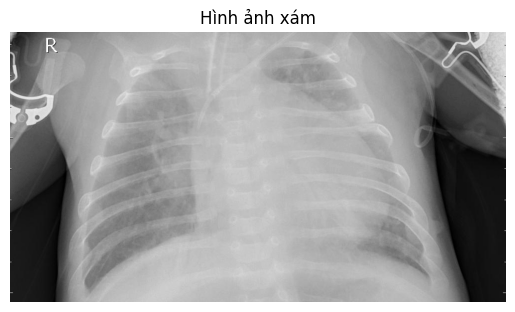

In [59]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Đọc ảnh và chuyển sang ảnh xám
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/test/test_pneumonia/person1_virus_7.jpeg')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Đổi kích thước ảnh xám về 150x150
img_resize = cv2.resize(img_gray, (150, 150))

# Thêm một chiều để khớp với đầu vào của mô hình và chuẩn hóa giá trị pixel về khoảng [0, 1]
img_resize = img_resize / 255.0
img_resize = np.expand_dims(img_resize, axis=-1)  # Thêm chiều kênh
img_resize = np.expand_dims(img_resize, axis=0)  # Thêm chiều batch

# Tải mô hình đã huấn luyện (thay 'loaded_model' bằng tên mô hình của bạn)
model_path = "/content/drive/MyDrive/Colab Notebooks/CNN_GRAY.h5"
loaded_model = tf.keras.models.load_model(model_path)

# Dự đoán
yhat = loaded_model.predict(img_resize)
max_index = np.argmax(yhat)
labels = ['Bình thường', 'Viêm phổi']  # Đảm bảo rằng các nhãn được định nghĩa trước

# In kết quả
print(yhat)
print('- Bình thường: ', round(yhat[0][0]*100,2), "%")
print('- Viêm phổi: ', round(yhat[0][1]*100,2), "%")
print("--> Nhãn dự đoán: ", labels[max_index])

# Hiển thị hình ảnh xám
plt.imshow(img_gray, cmap='gray')
plt.title("Hình ảnh xám")
plt.axis('off')
plt.show()

1/1 [==============================] - 0s 28ms/step
[[1.2452604e-06 9.9999881e-01]]
- Pneumonia:  100.0 %
- Normal:  0.0 %
--> Nhãn dự đoán:  Viêm phổi


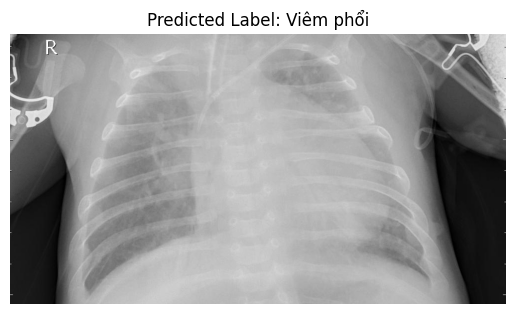

In [60]:
#
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Đọc và xử lý ảnh
img_path = '/content/drive/MyDrive/Colab Notebooks/test/test_pneumonia/person1_virus_7.jpeg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Đọc ảnh dưới dạng xám

if img is None:
    print("Lỗi: Không thể đọc hình ảnh từ đường dẫn:", img_path)
else:
    # Resize ảnh xám
    img_resized = cv2.resize(img, (150, 150))

    # Chuyển đổi ảnh về dạng tensor và bình thường hóa
    img_resized = img_resized / 255.0  # Bình thường hóa ảnh
    img_resized = np.expand_dims(img_resized, axis=0)  # Thêm chiều batch
    img_resized = np.expand_dims(img_resized, axis=-1)  # Thêm chiều kênh (1 kênh cho ảnh xám)

    # Dự đoán với mô hình
    yhat = loaded_model.predict(img_resized)
    max_index = np.argmax(yhat)
    predicted_label = labels[max_index]

    # In kết quả
    print(yhat)
    print('- Pneumonia: ', round(yhat[0][1]*100, 2), "%")
    print('- Normal: ', round(yhat[0][0]*100, 2), "%")
    print("--> Nhãn dự đoán: ", predicted_label)

    # Hiển thị ảnh
    plt.imshow(img, cmap='gray')  # Hiển thị ảnh xám
    plt.axis('off')
    plt.title(f"Predicted Label: {predicted_label}")
    plt.show()

##**MA TRẬN NHẦM LẪN**

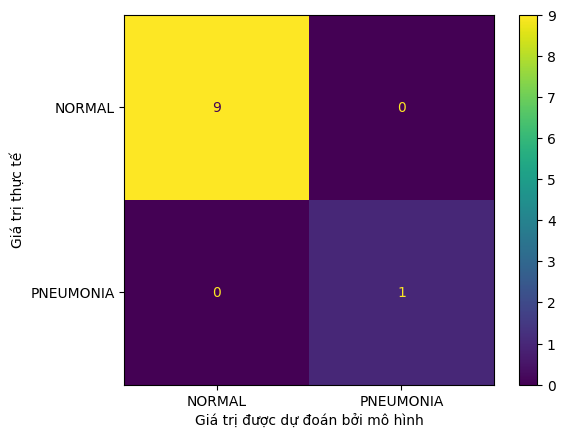

In [61]:
# Ma trận nhầm lẫn dạng đồ thị
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
matran = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test_new, y_pred_new), display_labels = ['NORMAL','PNEUMONIA'])
matran.plot()
plt.xlabel('Giá trị được dự đoán bởi mô hình')
plt.ylabel('Giá trị thực tế')
plt.show()

In [62]:
set(y_test_new)

{0, 1}

In [63]:
set(y_pred_new)

{0, 1}

In [64]:
max_indices1 = np.argmax(y_test, axis=1)
y_test_new = np.zeros_like(max_indices1)
y_test_new[max_indices1 == 1] = 1
y_test_new[max_indices1 == 2] = 2

In [65]:
y_test_new

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [66]:
from sklearn.metrics import accuracy_score
print("Độ chính xác của mô hình: ",accuracy_score(y_test_new, y_pred_new) * 100, "%")

Độ chính xác của mô hình:  90.0 %


In [ ]:
# Giả sử y_test và y_pred là các mảng chứa nhãn thực tế và dự đoán
# imgTest là danh sách các đường dẫn đến hình ảnh

for i in range(len(imgTest)):
    if y_test_new[i] == 1 and y_pred_new[i] == 1:
        print(f"Đường dẫn của hình ảnh thỏa mãn: {imgTest[i]}")